# Project: No Show Medical Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset is taken from 100k medical appointments in Brazil and focuses on whether or not patients show up for their appointment. The below will attempt to show what are the commonalities in regard to persons not showing up for their appointments.


**Dependent variable** - this is the variable that depends on other variables, the variable we are most interested in.
* No Show 

**Independent Variables**

* Neighborhood
* Age
* Gender
* Scheduled Day 
* Appointment Day
* What time the appointment is set for


### Questions

* Does gender have anything to do with if a person does not show up to their appointment?
* Does where a person live affect if they show up to their appointment?
* Does a certain age not show up more than other ages?
* What is the trend in times for persons who show and not show?


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
sns.set()

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [39]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Loaded in data and looked for any missing values. There were no missing values found, so no rows would have to be removed.
Also, not all columns in dataset need to be there in order to be used. Columns that should remain are as follows:
* PatientId
* AppointmentID
* Gender
* ScheduledDay
* AppointmentDay
* Age
* No-show

In [41]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [42]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [43]:
df.duplicated().sum()

0

In the preceding two cells, the only unique data is the appointment. Secondly there are no columns that are duplicated. Also, the datatypes are fine, excluding the dates. For the dates (ScheduledDay and AppointmentDay), they are strings, and in order to be used, they should be converted to a timestamp.

### Data Cleaning 

In [44]:
df = df.iloc[:,np.r_[0:7,13:14]]

Removed some of the columns from the dataframe that was not needed. Columns dropped - Scholarship, Hypertension, Diabetes, Alcoholism, Handcap, SMS Received.

In [45]:
df.ScheduledDay = pd.to_datetime(df.ScheduledDay)
df.AppointmentDay = pd.to_datetime(df.AppointmentDay)

In [46]:
df.dtypes

PatientId                float64
AppointmentID              int64
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
No-show                   object
dtype: object

In [47]:
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,No


Converted datetime string type to datetime objects.

<a id='eda'></a>
## Exploratory Data Analysis


###  Research Question 1 Does a gender not show up more than the other?

In [48]:
# Function to calculate percentage
def percentage(amount,total):
    return (amount / total) * 100


In [49]:
# first, filter for all of the no-show's
noshow = df['No-show'] == "Yes"
df_noshow = df[noshow]

In [50]:
# check for amount of no show's
df_noshow['Gender'].count()

22319

In [51]:
df_noshow_count = df_noshow['Gender'].count()

Firstly above we filtered for the amount of no shows. Also, we looked at the amount of no shows, which shows to be **22,319**

In [52]:
# filter for all of the males in dataset
males = df_noshow['Gender'] == 'M'

In [53]:
male_count = df_noshow[males]['Gender'].count()

In [54]:
print("Gender male count of no shows", male_count)

Gender male count of no shows 7725


In [55]:
# filter for all females in dataset
females = df_noshow['Gender'] == 'F'

In [56]:
female_count = df_noshow[females]['Gender'].count()

In [57]:
print("Gender female count of no shows", female_count)

Gender female count of no shows 14594


Above, calculated the amount of male and female count within the no-show subset of the dataset.

In [58]:
print(percentage(male_count,df_noshow_count))

34.6117657601


In [59]:
print(percentage(female_count,df_noshow_count))

65.3882342399


In previous cells, calculated the percentage of male and female no shows in the dataset.

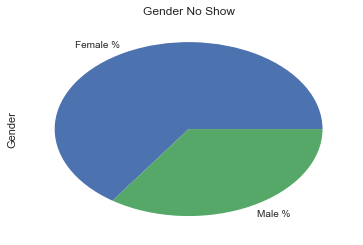

In [60]:
df_noshow.Gender.value_counts().plot(title="Gender No Show",kind='pie',labels=['Female %','Male %']);

This shows us that out of all of the persons that do not show, the females outweigh the males by 31%.

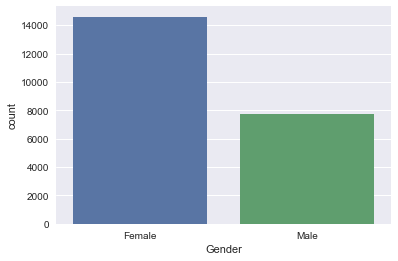

In [61]:
sns.countplot(df_noshow.Gender.replace({'F':'Female','M':'Male'}))

This chart shows the amount of females to males there are in this dataset.

### Research Question 2  Does where a person live affect their showing up?

In [62]:
#look up the patients who have shown up
show = df['No-show'] == "No"
df_show = df[show]

In [63]:
df_show.Neighbourhood.value_counts().count()

80

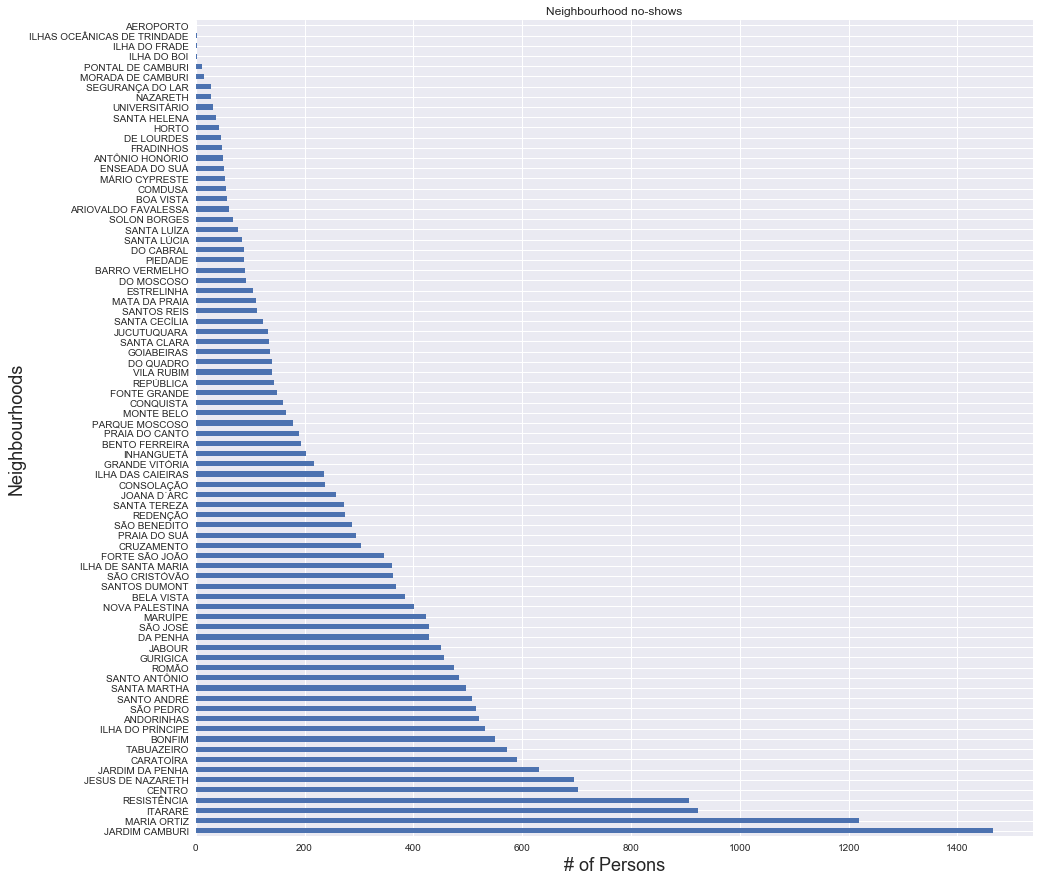

In [88]:
ax = df_noshow.Neighbourhood.value_counts().plot(kind='barh',figsize=(15,15),title="Neighbourhood no-shows");
ax.set_ylabel('Neighbourhoods',fontsize=18);
ax.set_xlabel('# of Persons', fontsize=18);

The preceding chart indicates the amount of persons not showing up per neighbourhood. As seen above, Jardim Camburi has the most persons on this list who does not show up.

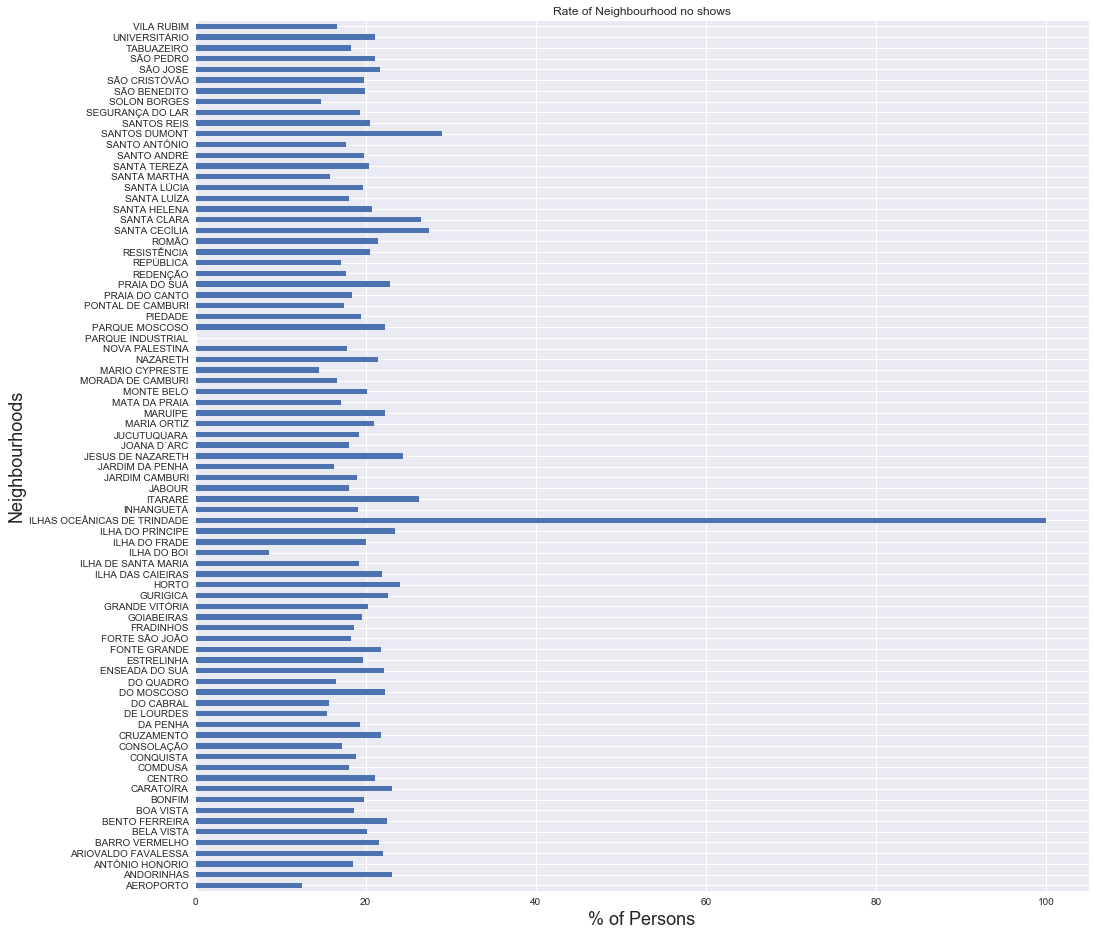

In [90]:
df_percentage = percentage(df_noshow.Neighbourhood.value_counts(),df.Neighbourhood.value_counts())
ax = df_percentage.plot(kind='barh',title='Rate of Neighbourhood no shows', figsize=(16,16));
ax.set_ylabel('Neighbourhoods',fontsize=18);
ax.set_xlabel('% of Persons',fontsize=18);

This shows the percentage of amount of persons who do not show up in comparison to total persons showing up. E.G If 10 persons have an appointment and 2 persons do not show, 20% do not show up.

### Research Question 3: Does a certain age not show up more than other ages?

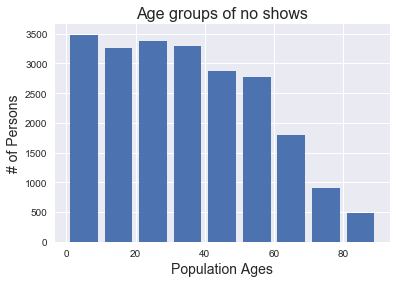

In [93]:
bins = [0,10,20,30,40,50,60,70,80,90]


plt.hist(df_noshow.Age,bins=bins,histtype='bar',rwidth=0.8)
plt.xlabel('Population Ages',fontsize=14)
plt.ylabel('# of Persons',fontsize=14)
plt.title('Age groups of no shows',fontsize=16)
plt.grid(True)

plt.show()

The preceding chart shows the distribution of ages in this group for persons that have not shown up.

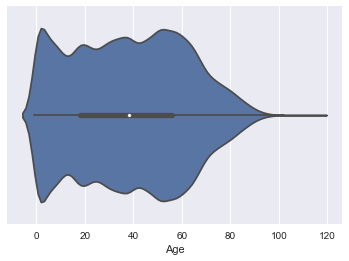

In [67]:
# show the age of persons in the dataset
sns.violinplot(x=df_show['Age']);

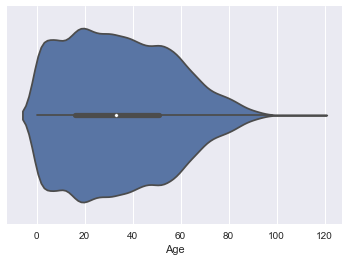

In [68]:
#persons who did not show up
ax = sns.violinplot(x=df_noshow['Age'],inner="box");

Both plots above show comparisons between persons who have shown and persons who haven't. For persons who have shown up, we can see that the majority seems to be around the age of 50. For persons who have not shown up, the peak is around the age of 20.

### Research Question 4: What is the trend in times for persons who show and not show?

In [69]:
df_noshow.AppointmentDay.dt.dayofweek.value_counts()

1    5152
2    5093
0    4690
4    4037
3    3338
5       9
Name: AppointmentDay, dtype: int64

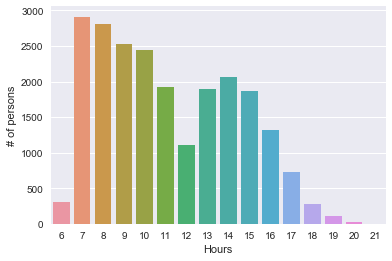

In [70]:
ax = sns.countplot(df_noshow.ScheduledDay.dt.hour);
ax.set(ylabel='# of persons',xlabel='Hours');

This chart shows the times that persons who did not show up schedule. It looks like the highest peak is in the morning at 7AM and it gradually decreases.

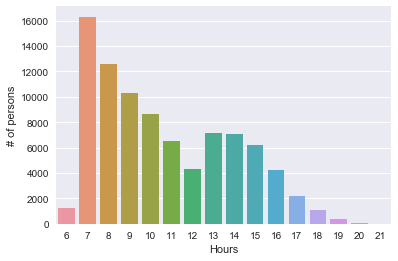

In [71]:
ax = sns.countplot(df_show.ScheduledDay.dt.hour);
ax.set(ylabel='# of persons',xlabel='Hours');

This shows the times that persons have scheduled who have shown up. The peak is at 7AM and it decreases much as the hours go on. This would show that a characteristic of those who show up generally schedule to have an appointment early (mostly 7AM).

<a id='conclusions'></a>
## Conclusions

* Question 1 - From the findings there are generally more female than male genders in the dataset. Also, by proportion there is a higher percentage of female than male. However, limitations arise because there are far more females to males in the dataset so this is not an accurate picture of gender no shows.
* Question 2 - in response to if where a person lives affects them showing up we can answer as to which neighborhoods most persons who do not show reside in. This would be *Jardim Camburi* and *Maria Ortiz* to name the top two. However, this does not account for the mount of persons who live in this neighborhood in the dataset. Also, to further explore this, it would be beneficial to know how far these neighborhoods are from the doctors office.
* Question 3 - From the charts we can see that persons around the age of 50 show up the most and persons around the age of 20 show up the least.
* Question 4 - Comparing persons who do and do not show up in regards to time, the major difference is that persons who show up mainly schedule their appointments for the majority earlier. Limitations in this regard are that time are not given for appointments. This would then show what times persons miss their appointment.

Resources used for findings: N/A